In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn import svm
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from mpl_toolkits.mplot3d import Axes3D

In [2]:
img = plt.imread('flask_app/static/user_input/user_image.jpg')

classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]


Width = img.shape[1]
Height = img.shape[0]

In [3]:
# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [4]:
# create input blob 
# set input blob for the network
net.setInput(cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False))

# run inference through the network
# and gather predictions from output layers

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

In [5]:
class_ids = []
confidences = []
boxes = []


In [6]:
# #First I identified the range for the three colors.
# color_list=["yellow","red","black"]
# boundaries = [
#     ((181,166,66), (255,255,240)), #yellow
#     ((130, 45, 45), (50, 56, 200)), #red
#     ((0,0,0),(20,20,20)) #black
#     ]
# mask=[]
# #Then I applied OpenCV’s inRange function to create masks for three colors.
# for i in range(len(color_list)):
#     lower=boundaries[i][0]
#     upper=boundaries[i][1]
#    # mask.append(cv2.inRange(image, lower, upper))


#     if i==1:
#         lower = np.array([155,25,0])
#         upper = np.array([179,255,255]) 
#     #     # lower mask (0-10)
#     #     lower_red = np.array([0,50,50])
#     #     upper_red = np.array([10,255,255])
#     #     mask0 = cv2.inRange(image, lower_red, upper_red)

#     #     # upper mask (170-180)
#     #     lower_red = np.array([160,50,50])
#     #     upper_red = np.array([180,255,255])
#     #     mask1 = cv2.inRange(image, lower_red, upper_red)

#     #     # join my masks
#     #     mask = mask0+mask1
#     mask=cv2.inRange(image, lower, upper)
#     output = cv2.bitwise_and(image, image, mask = mask)
#     fig = plt.figure(figsize=(20,10))
#     ax1 = fig.add_subplot(1,1,1)
#     ax1.imshow(output)
#     plt.title(f"{color_list[i]}")
    

In [7]:
# #Then use bitwise_and to apply masks to the frame.
# output = cv2.bitwise_and(image, image, mask = mask)
# #Three colors are extracted now

In [1]:
# #Now we need to apply these mask to the detection.
# # I cropped the image based on the bounding box detected then applied the masks.
# crop_img = frame[ymin:ymax, xmin:xmax]

In [6]:
#create bounding box 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [7]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
print("==>> indices.shape: ", indices.shape)

==>> indices.shape:  (28,)


In [8]:
#check if is people detection
player_number=0
u_im=[] # player postion
boxes_player=[]
for i in indices:
    box = boxes[i]
    if class_ids[i]==0:
        boxes_player.append(box)

        label = str(f"player{player_number}") 
        player_number +=1
        cv2.rectangle(img, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
        cv2.putText(img, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        bottom_right_corner=(round(box[0]+box[2]),round(box[1]+box[3]))
        u_im.append(bottom_right_corner)

Text(0.5, 1.0, 'detection')

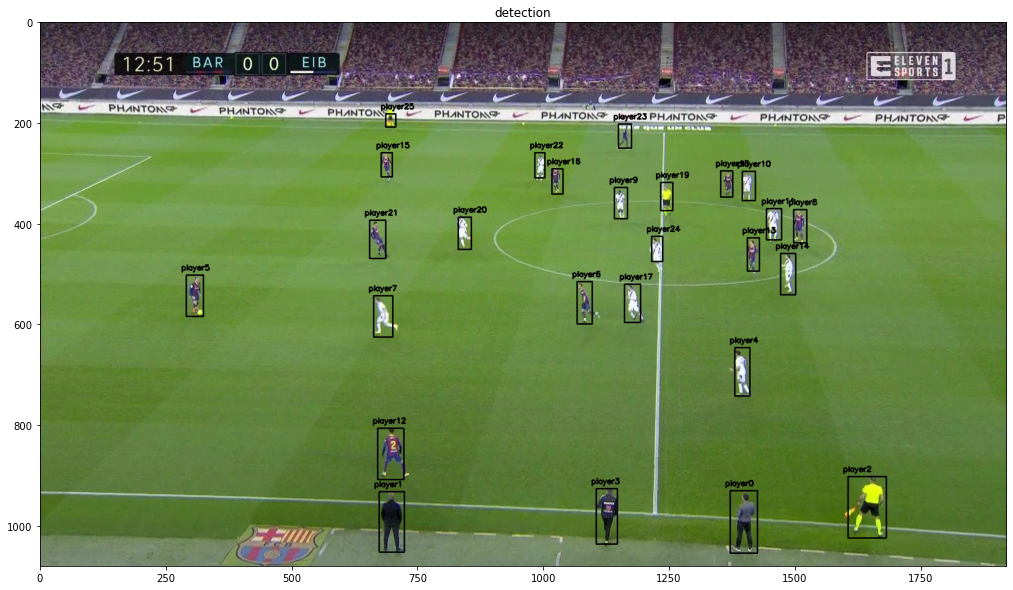

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img)
plt.title("detection")
#

import the coordinates of the players to the calibration script

In [12]:
import csv
with open('GFG.csv', 'w',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    writer.writerows(u_im)

In [20]:
import csv
list=[1,2,3,4,5]
list2=[6,7,8,9,10]
with open('list.txt', 'a',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    writer.writerow(list)
#n= nombre d'images

with open('list.txt', 'a',newline='') as outfile:
    writer = csv.writer(outfile)
    #writer.writerow(["",""])
    for i in range(n-1):
        for j in range(len(list2)):
            writer.writerow(list2[j])

In [ ]:
l=[]

This calibration works only for this photo, but i will make it work for other photos.

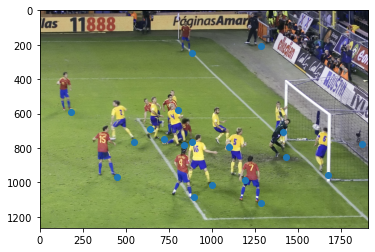

ValueError: shapes (3,3) and (19,2) not aligned: 3 (dim 1) != 19 (dim 0)

In [13]:
%run ./calibration.py 

### Team classification

In [10]:
p=4 # player number

To classify the players, we need to make clusters of players.  
we will use the k-means algorithm on the cropped images of the players.

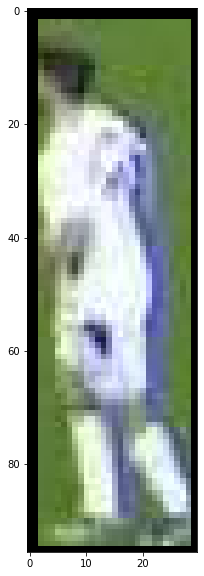

In [11]:
def get_cropped_box(box:list) -> list:
    """crop the image based on the bounding box

    Args:
        box (list): list of the box boundary of the player

    Returns:
        list: return the cropped image as list
    """
    player_crop=img[round(box[1]):round(box[1]+box[3]),round(box[0]):round(box[0]+box[2])]
    return player_crop
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(get_cropped_box(boxes_player[p]))

In [12]:
def image_to_pandas(image:list) -> pd.DataFrame:
    """convert the image to pandas dataframe

    Args:
        image (list): image as list

    Returns:
        pd.DataFrame: return the image as pandas dataframe
    """
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_player = image_to_pandas(get_cropped_box(boxes_player[p]))
df_player.head(5)

,Red_Channel,Green_Channel,Blue_Channel
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


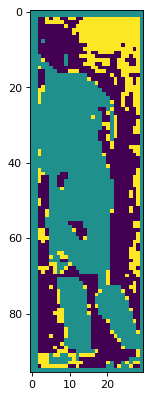

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  3,random_state=42).fit(df_player)
result = kmeans.labels_.reshape(get_cropped_box(boxes_player[p]).shape[0],get_cropped_box(boxes_player[p]).shape[1])
plt.imshow(result, cmap='viridis')
plt.show()

We then define the k-means algorithm as follows:


In [19]:
nbr_cluster=2

In [15]:
def get_clusters(box: list) -> list:
    """get the clusters of the image

    Args:
        box (list): list of the box boundary

    Returns:
        list: k-means,center of the clusters,and result masks
    """
    # box=get_cropped_box(box)
    # image = Image.fromarray(box,'RGB')
    # pixels = np.array(list(image.getdata()))
    # #fit KMeans and get centroids
    # kmeans = KMeans(n_clusters = 2)
    # kmeans = kmeans.fit(pixels)
    # centroids = kmeans.cluster_centers_
    # return kmeans, centroids
    box=get_cropped_box(box)
    image = Image.fromarray(box,'RGB')
    pixels = np.array(list(image.getdata()))
    kmeans = KMeans(n_clusters=  nbr_cluster,random_state=42).fit(image_to_pandas(box))
    result = kmeans.labels_.reshape(np.shape(image)[0],np.shape(image)[1])
    centroids = kmeans.cluster_centers_
    return kmeans, centroids,result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2


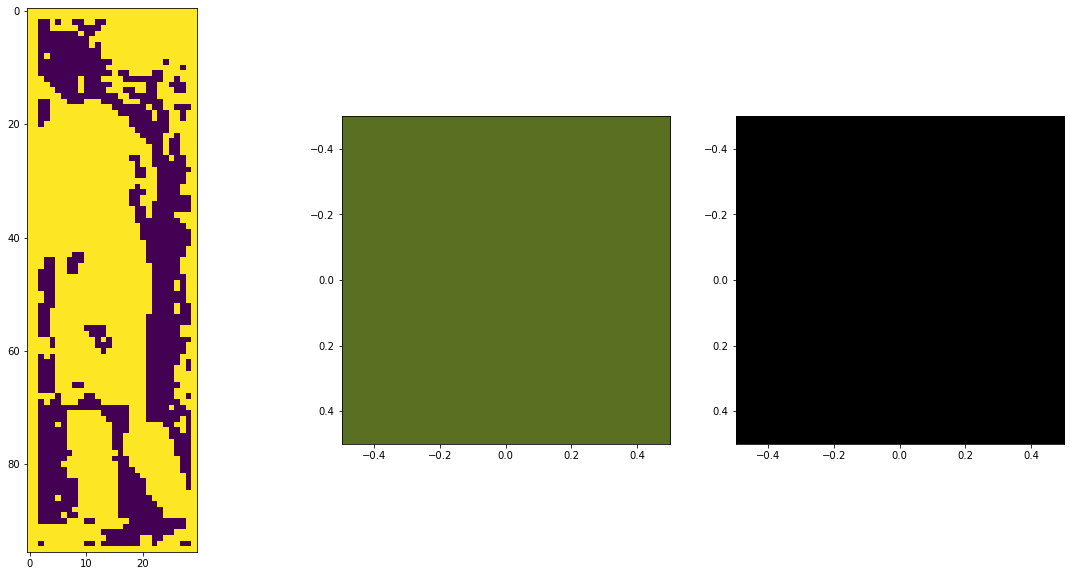

In [20]:
def show_clusters(i):
    clusters=get_clusters(boxes_player[i])[1]
    result=get_clusters(boxes_player[i])[2]

    fig = plt.figure(figsize=(20,10))
    axis=[fig.add_subplot(1,nbr_cluster+1,k) for k in range(1,nbr_cluster+2)]
    
    #ax.append(fig.add_subplot(1,nbr_cluster,1))
    axis[0].imshow(result,cmap='viridis')
    for j in range(1,nbr_cluster+1):
        #axis.append(plt.add_subplot(1,nbr_cluster+1,j+1))
        axis[j].imshow([[(int(clusters[j-1,0]), int(clusters[j-1,1]), int(clusters[j-1,2]))]])
        print(j)
        #ax[j].title(f"cluster {j}")
    # fig = plt.figure(figsize=(20,10))
    # ax1 = fig.add_subplot(1,nbr_cluster+1,1)
    # ax1.imshow([[(int(clusters[0,0]), int(clusters[0,1]), int(clusters[0,2]))]])
    # ax2 = fig.add_subplot(1,2,2)
    # ax2.imshow([[(int(clusters[1,0]), int(clusters[1,1]), int(clusters[1,2]))]])
show_clusters(p)

show clusters of all players

In [21]:
import numpy as np
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
np.delete(arr, 3, 1)


array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

the dominant colors of image 0 [[ 16.91944709  -6.55767398  27.12631077]
 [ 80.50674206 102.78664637  52.15658982]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 1 [[ 83.15726731 103.8000917   64.77166437]
 [ 28.46792354  -4.49803614  34.47656455]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 2 [[ 80.36200327 110.57230993  34.72908728]
 [-13.12470088 -28.32305238  35.02712045]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 3 [[16.3261079  -1.79238921 24.89065511]
 [79.30503145 98.41705975 55.62893082]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 4 [[ 90.86324786 111.06196581  33.96474359]
 [ -5.72530864 -52.79783951  -2.77983539]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 5 [[  49.76704545   59.20241477   52.87357955]
 [  66.21521739 -110.94202899   57.46666667]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 6 [[  22.36420233   29.54474708   33.96498054]
 [ 110.92793522 -112.08259109   78.1417004 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 7 [[ -29.49177215  -18.71898734  -17.97974684]
 [ 108.36197917 -112.13085937   62.78971354]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 8 [[-45.23153409 -37.86505682 -16.15198864]
 [ 96.58893281  -3.66996047  81.9298419 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 9 [[110.99852507 -67.36725664  88.46755162]
 [-39.02034261 -32.98179872 -21.34261242]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\HAMZAO~1\AppData\Local\Temp/ipykernel_15088/3652664652.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20,10))


1
2
the dominant colors of image 10 [[ 112.2078853  -113.85663082   65.47311828]
 [ -18.39473684  -11.09263158  -19.34421053]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 11 [[ -23.21364318  -15.7143928   -19.64917541]
 [ 115.2148289  -112.53422053   31.91064639]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 12 [[-17.67260788 -10.87523452   6.30956848]
 [ 80.65266635  96.58046248  64.65809344]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 13 [[  55.85252809 -108.37219101   49.03230337]
 [  49.59059633   57.80504587   48.43119266]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 14 [[ -13.14344544   -0.96087852  -10.64722032]
 [ 107.29910269 -116.41774676   49.08275174]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 15 [[ 98.78903654  -6.08139535  71.56976744]
 [-54.50220264 -34.74008811   9.18281938]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 16 [[ 113.88688946 -108.77377892   67.17994859]
 [  14.91701828   22.45007032   32.81997187]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 17 [[ 111.26646403 -115.27355623   78.4964539 ]
 [ -16.89619377   -7.86020761   -7.02560554]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 18 [[  46.58895706   52.49846626   46.30214724]
 [  68.12080537 -110.62583893   59.44127517]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 19 [[ -32.45594914  -17.79473206   24.00635786]
 [ 118.48148148 -109.18106996   64.58436214]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 20 [[ -29.93599258  -23.54359926  -15.34879406]
 [ 113.39931741 -107.83788396   73.12627986]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 21 [[ 115.73776224 -105.45716783   80.11625874]
 [  16.75310559   23.92313665   35.60403727]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 22 [[-40.32872504 -30.30875576 -22.40399386]
 [110.27793696 -73.2722063   78.93409742]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 23 [[100.12463343 -24.42961877  91.90322581]
 [-41.22438163 -40.76325088 -13.25618375]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 24 [[106.025      -30.26666667  80.59166667]
 [-36.18367347 -29.55714286 -17.50102041]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
the dominant colors of image 25 [[ 27.32721713   5.81039755   5.75840979]
 [-73.48186528 -67.43005181  67.70466321]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
2
(26, 2, 3)


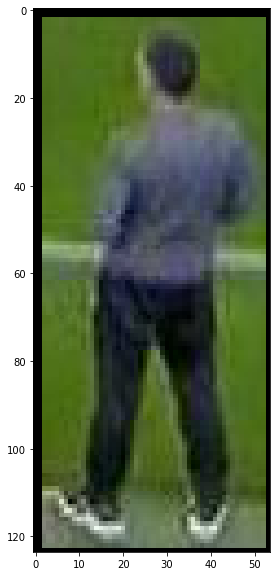

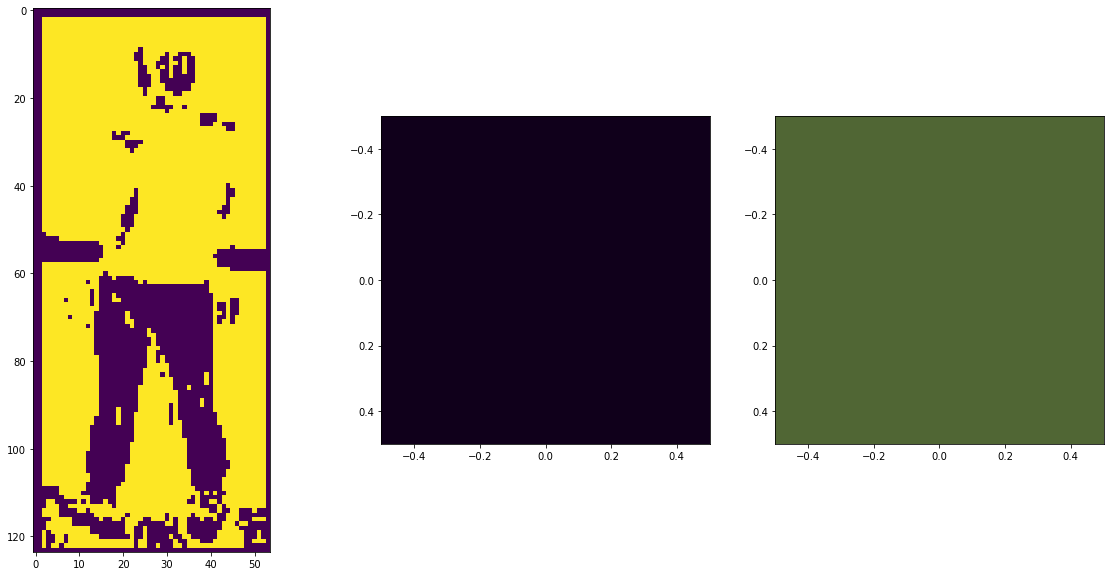

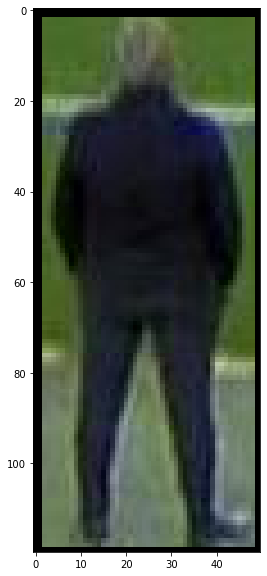

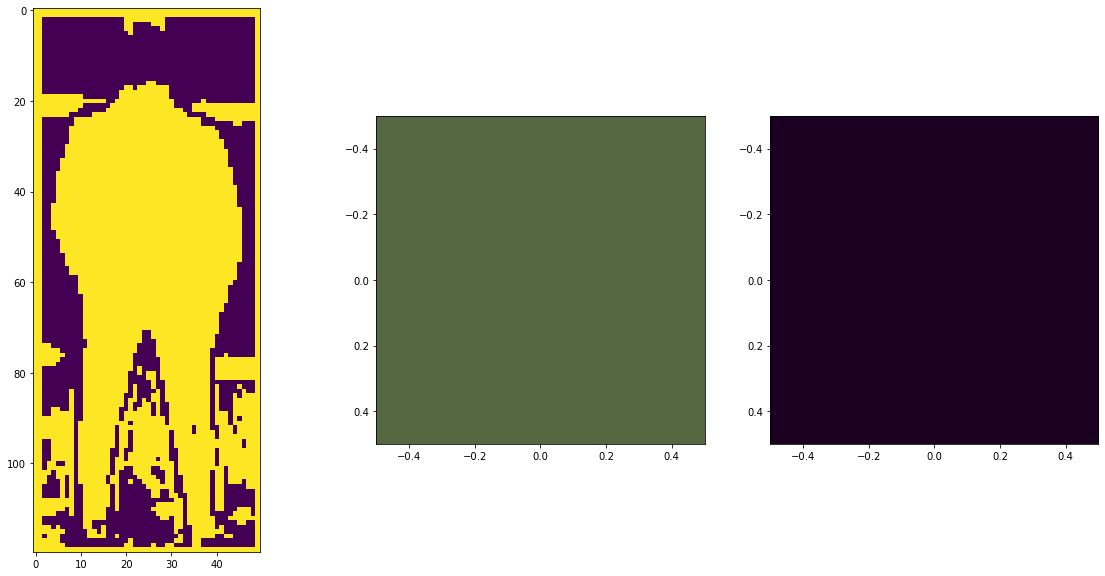

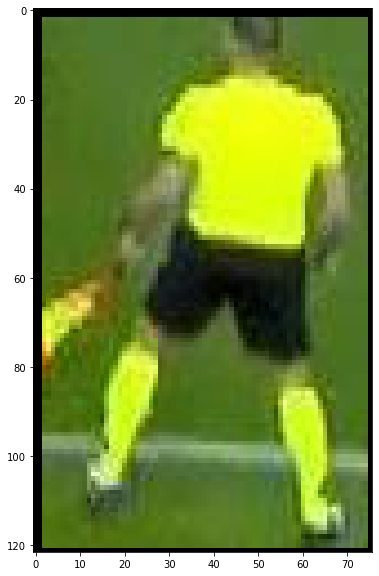

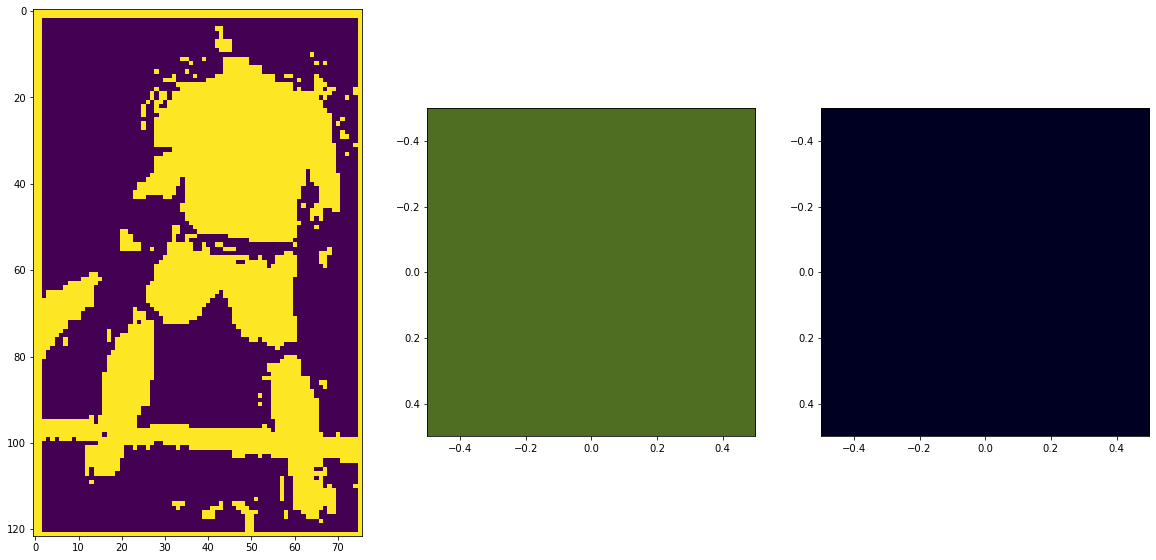

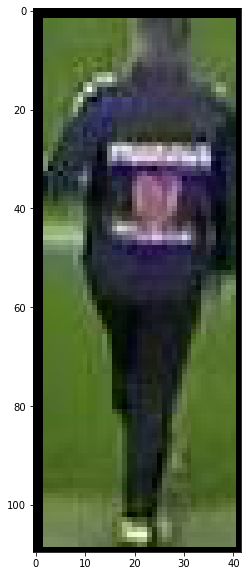

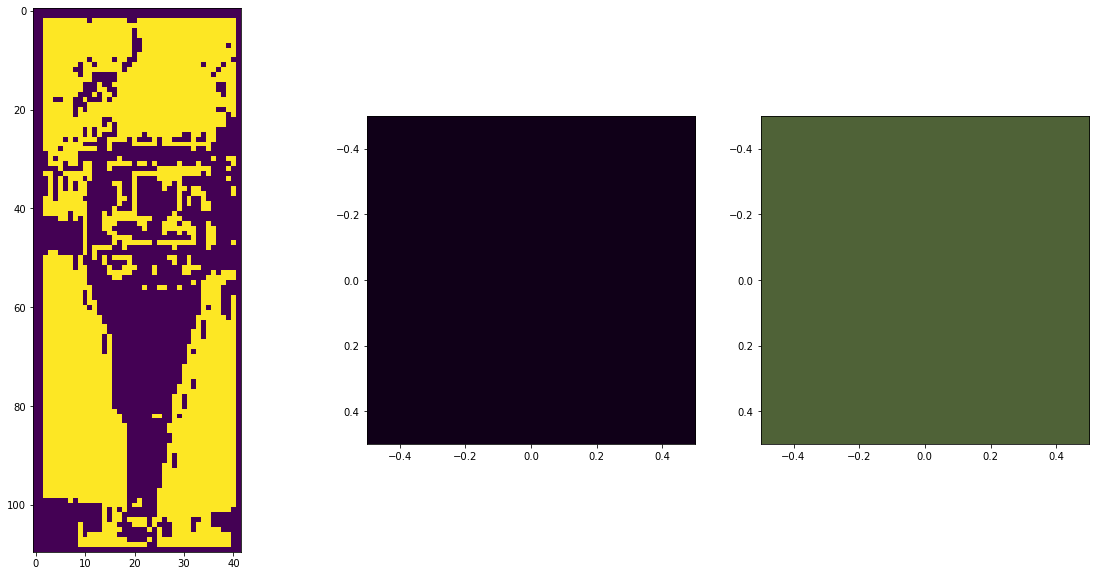

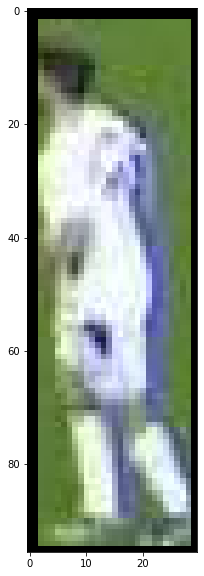

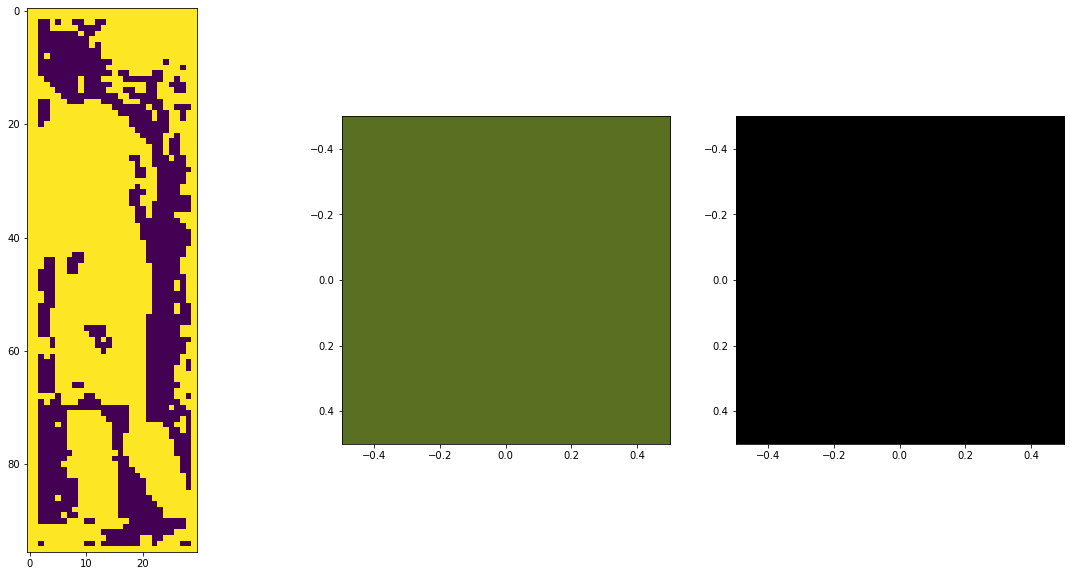

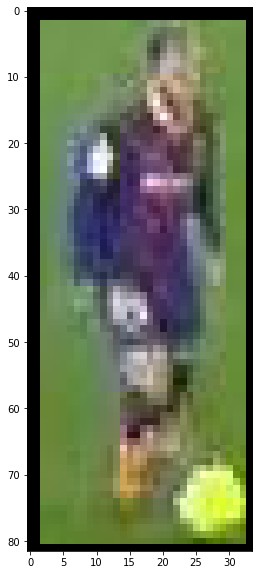

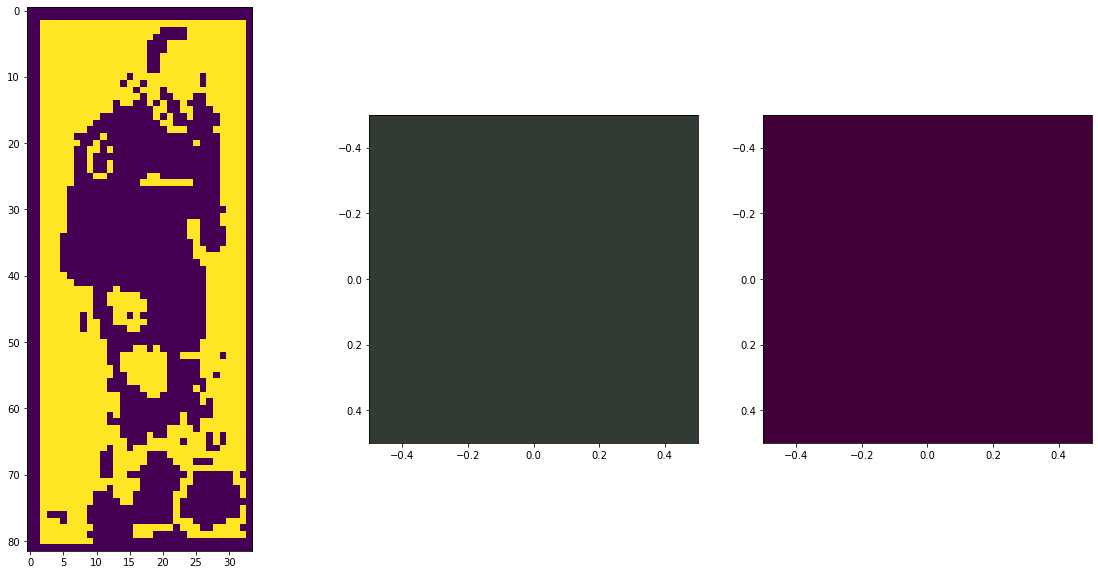

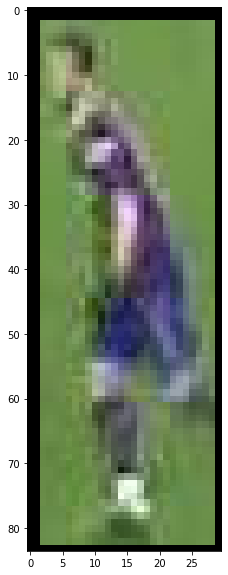

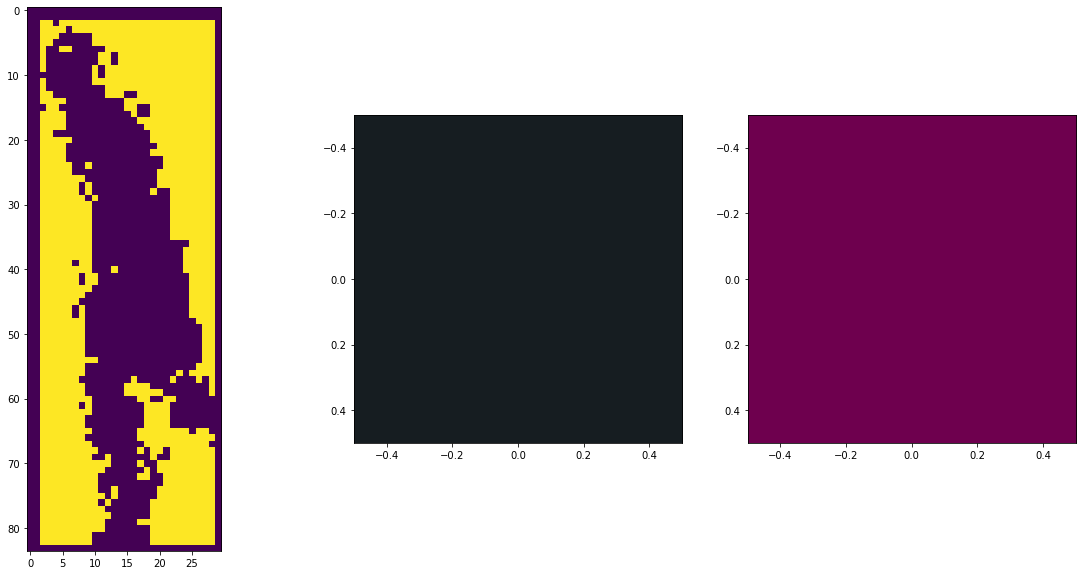

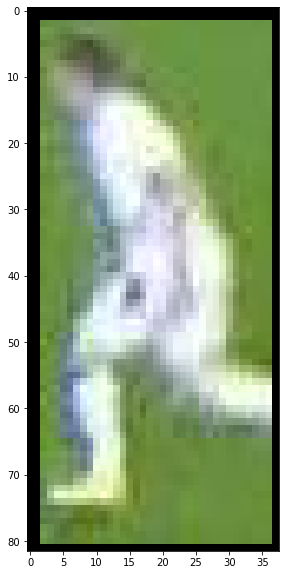

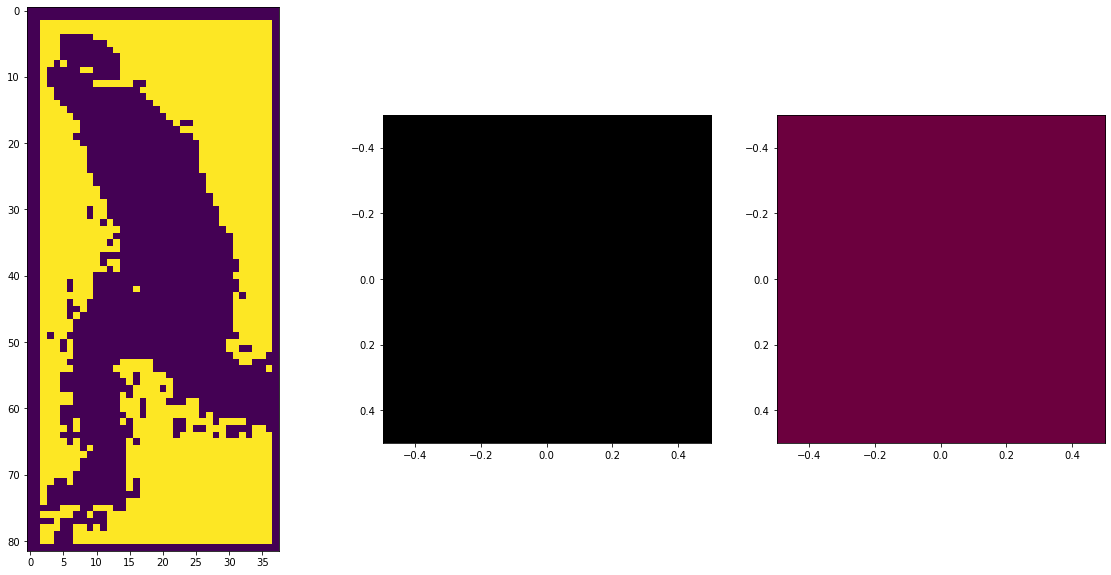

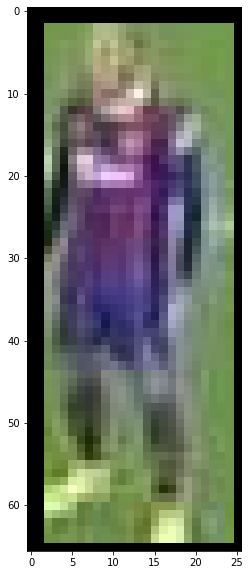

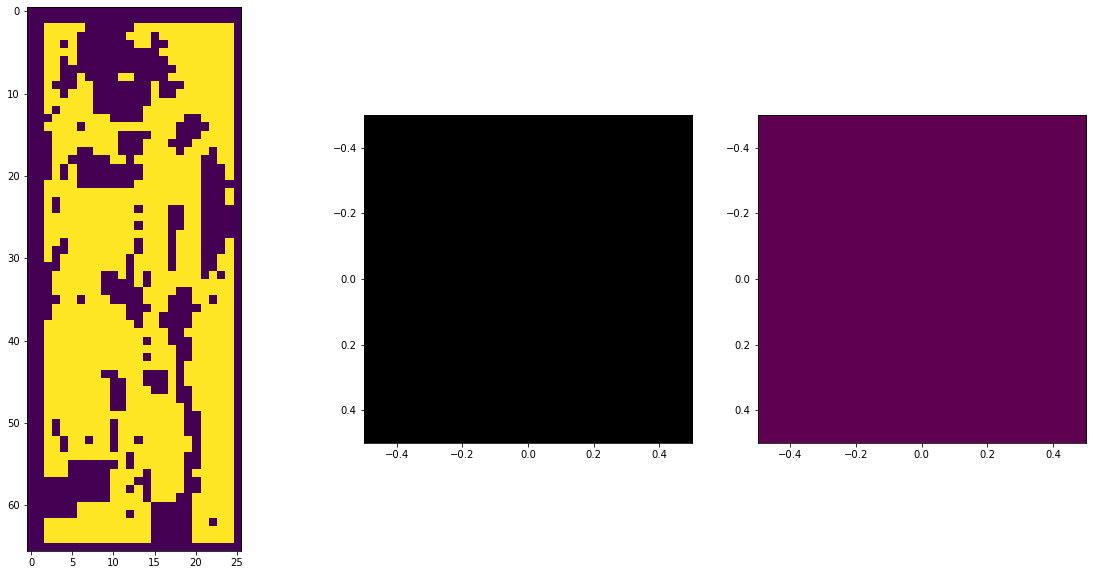

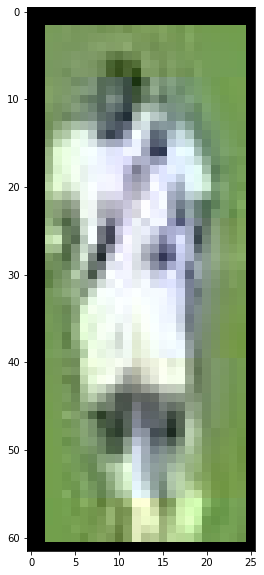

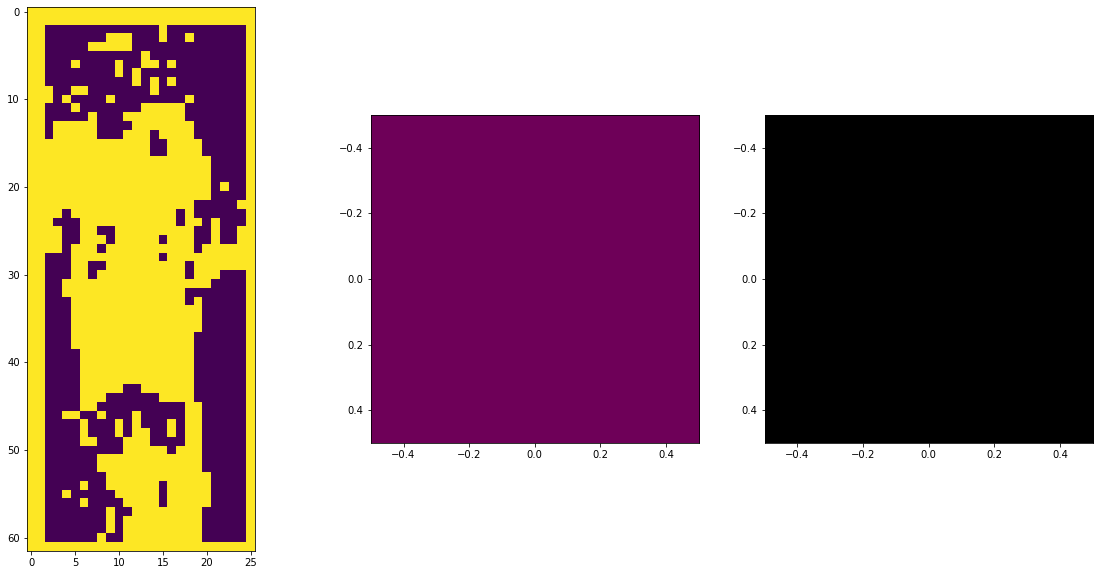

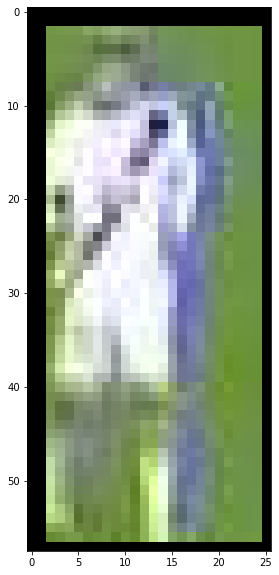

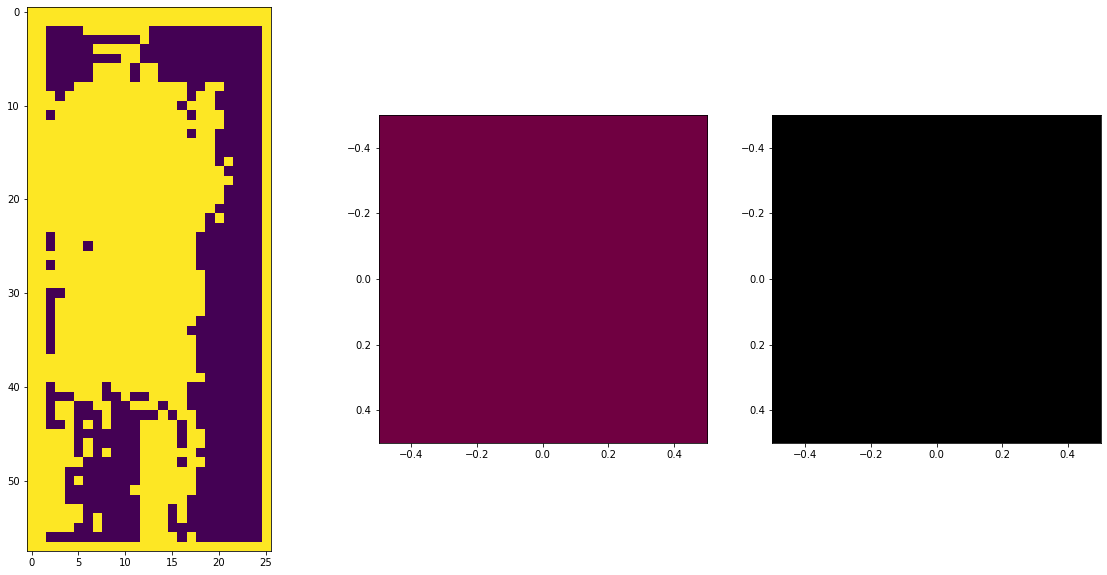

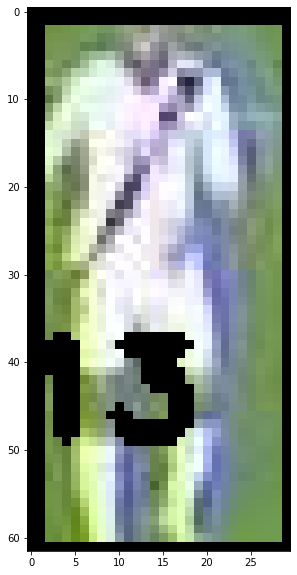

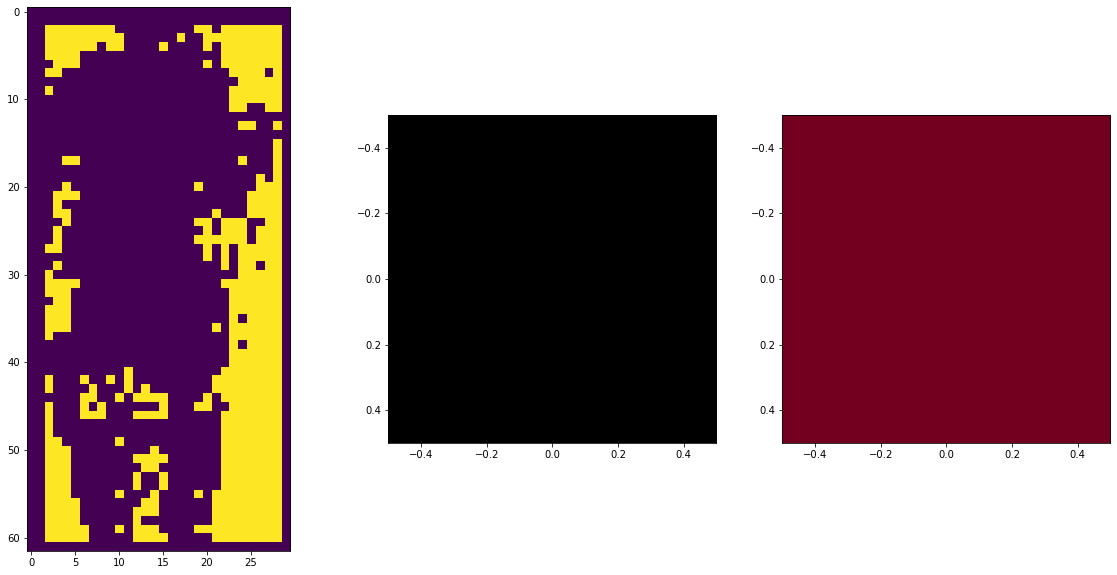

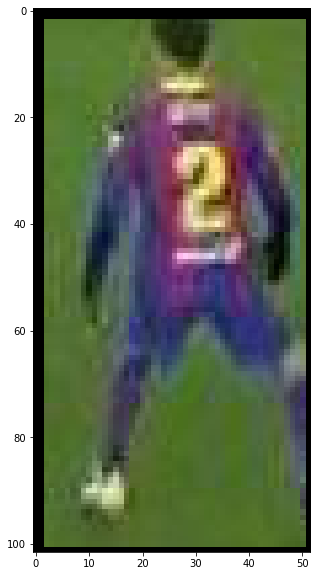

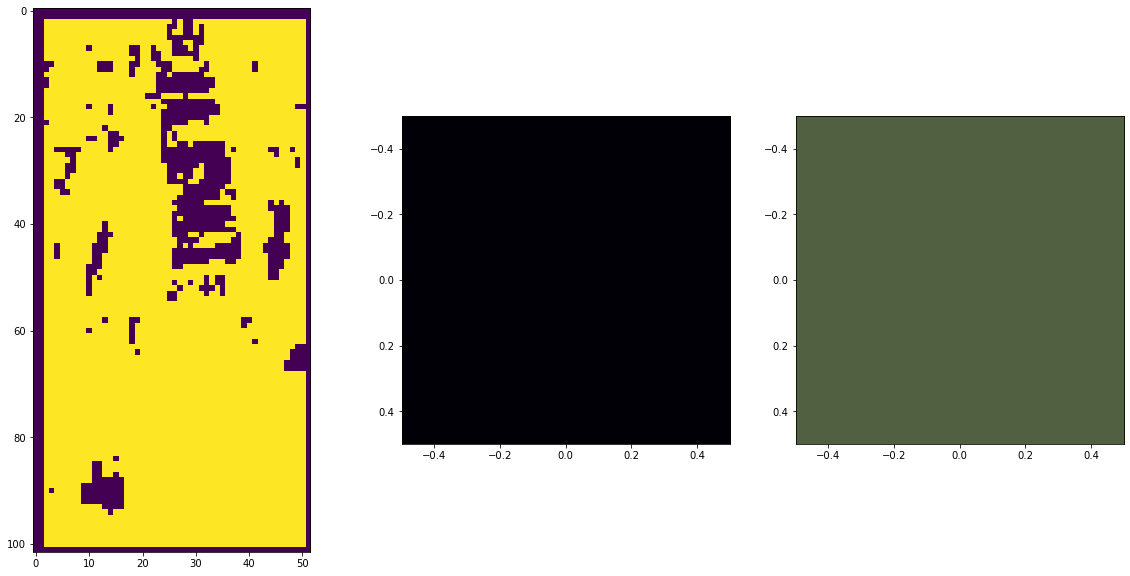

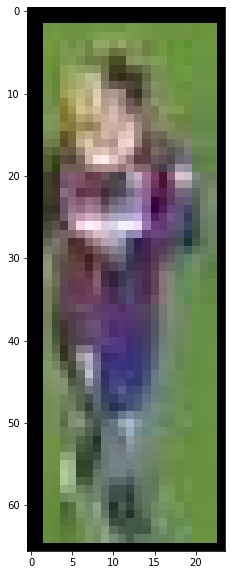

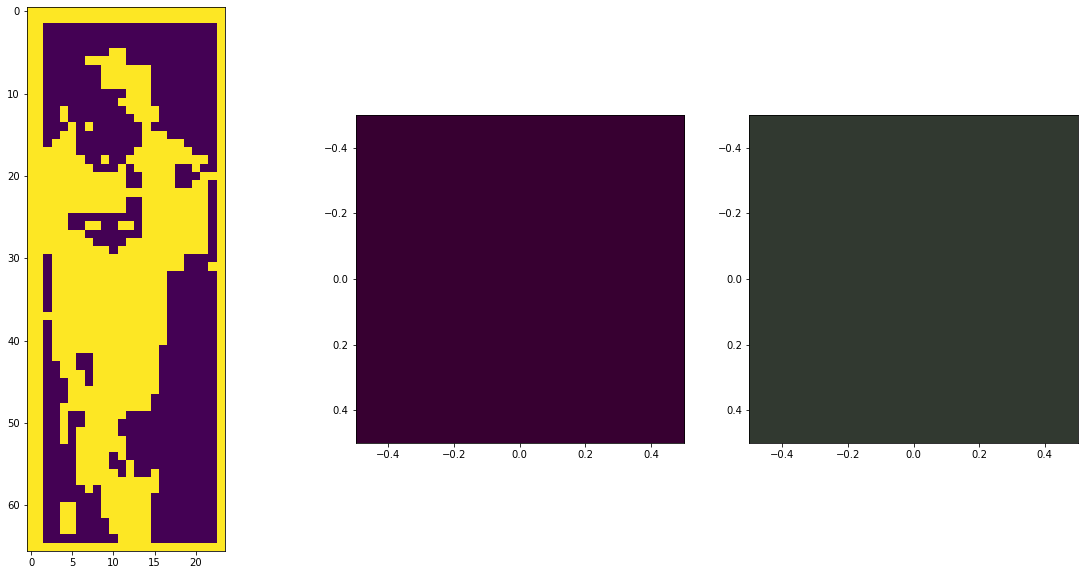

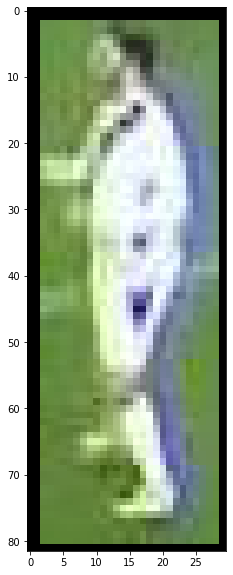

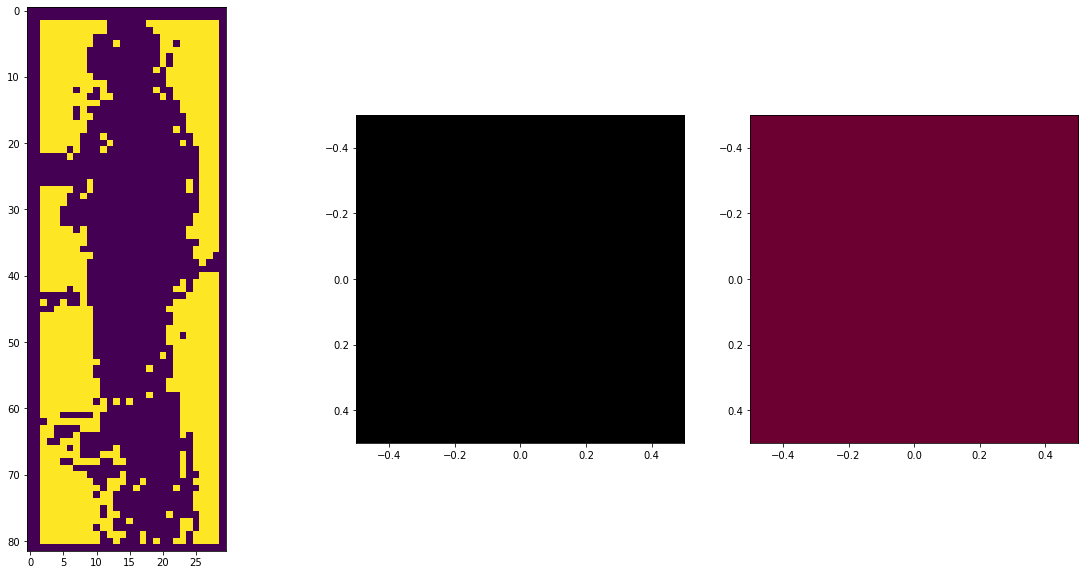

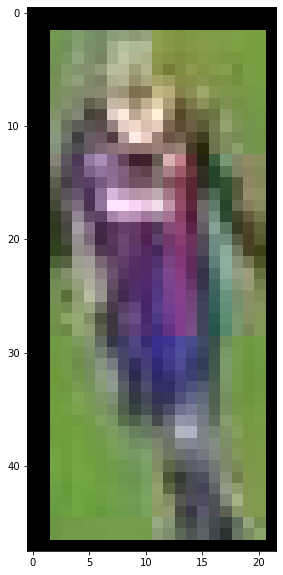

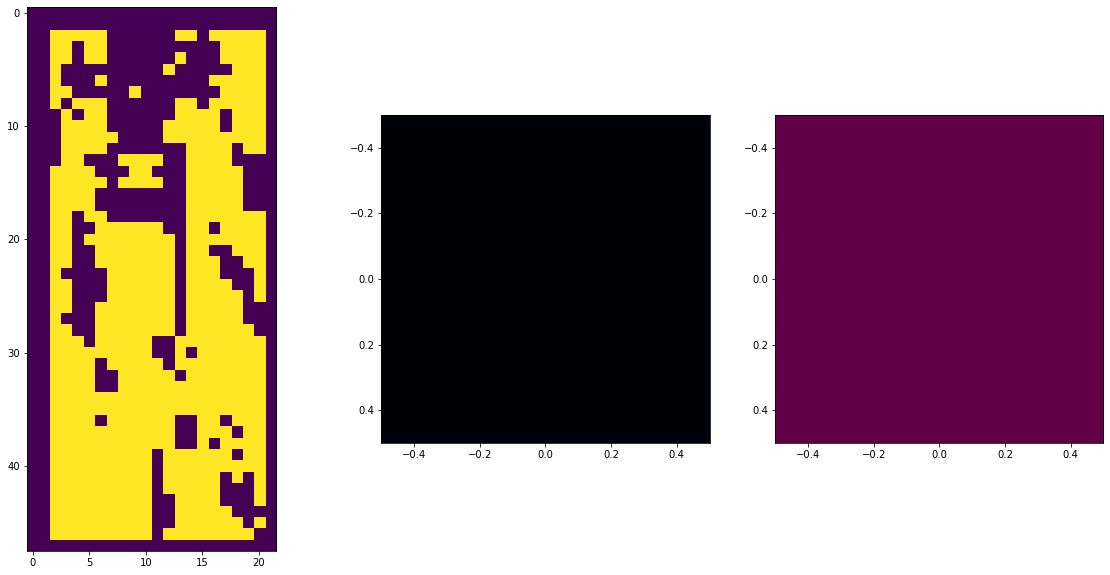

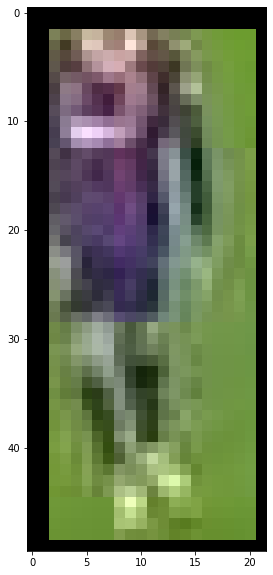

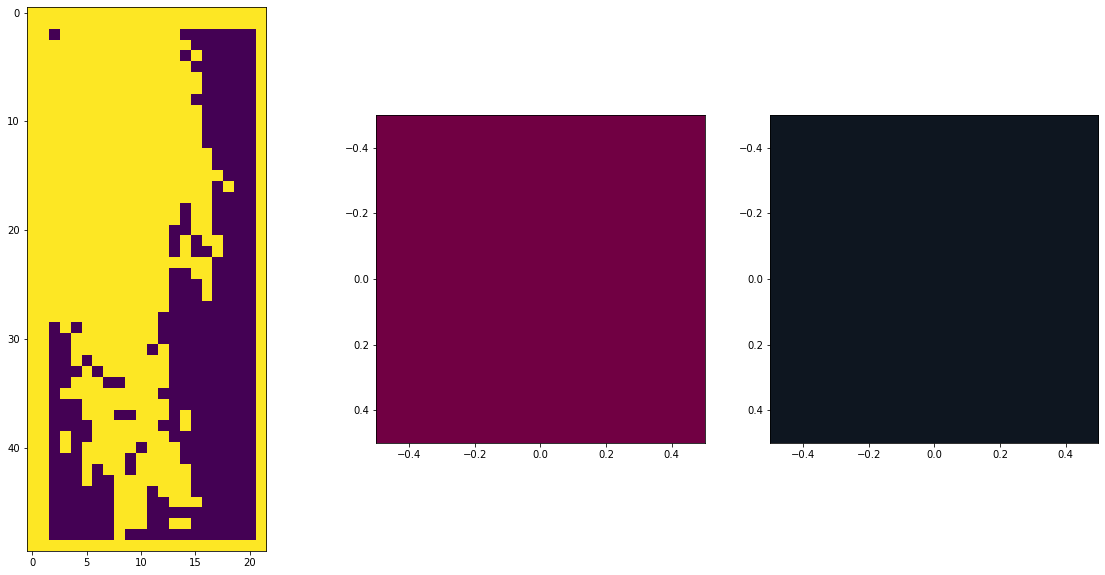

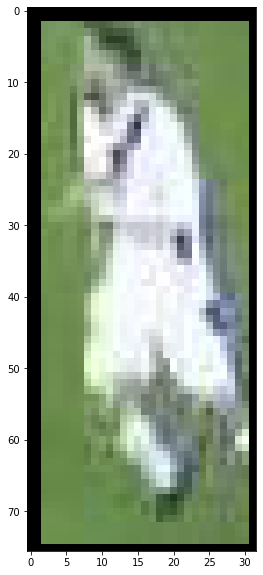

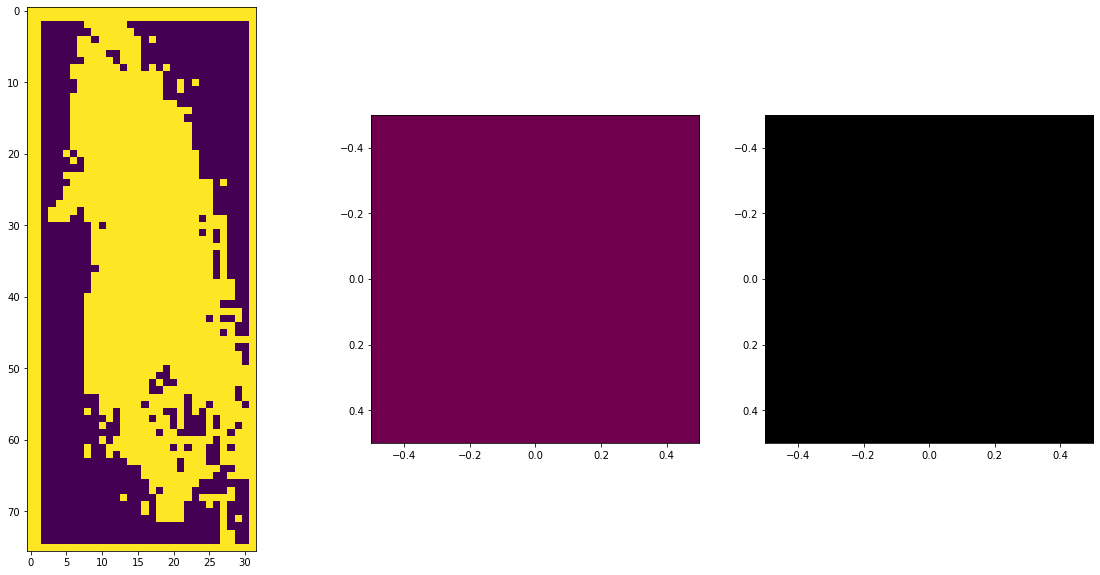

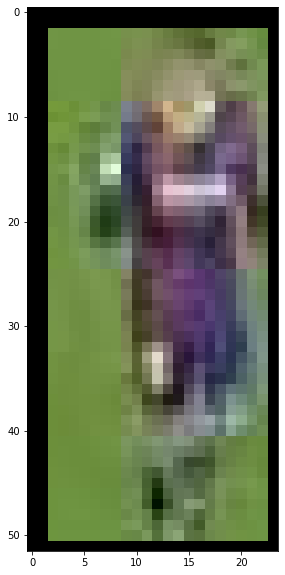

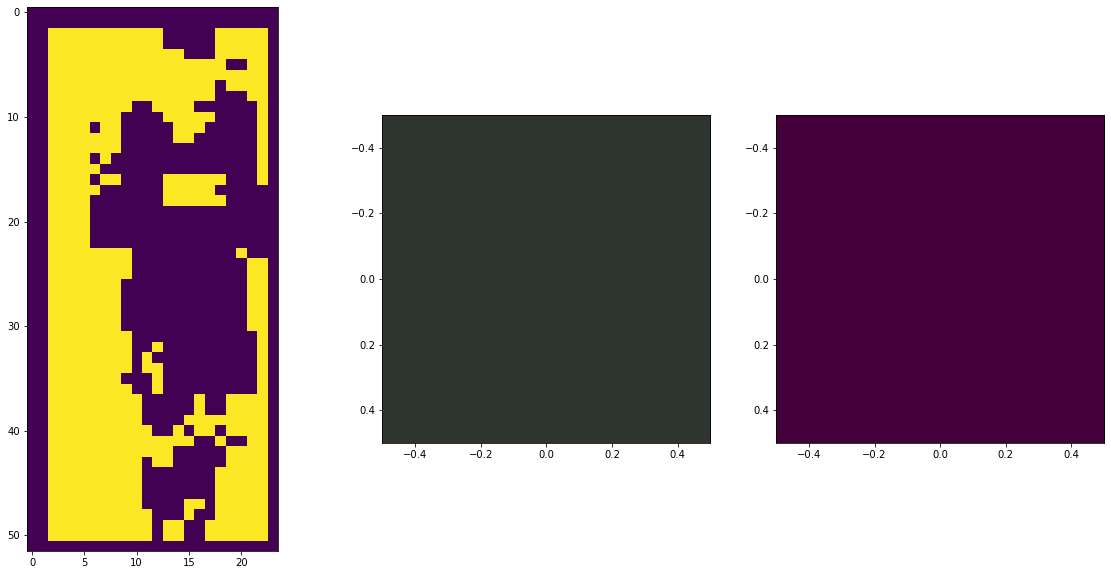

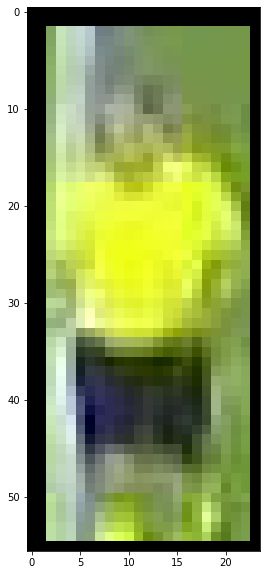

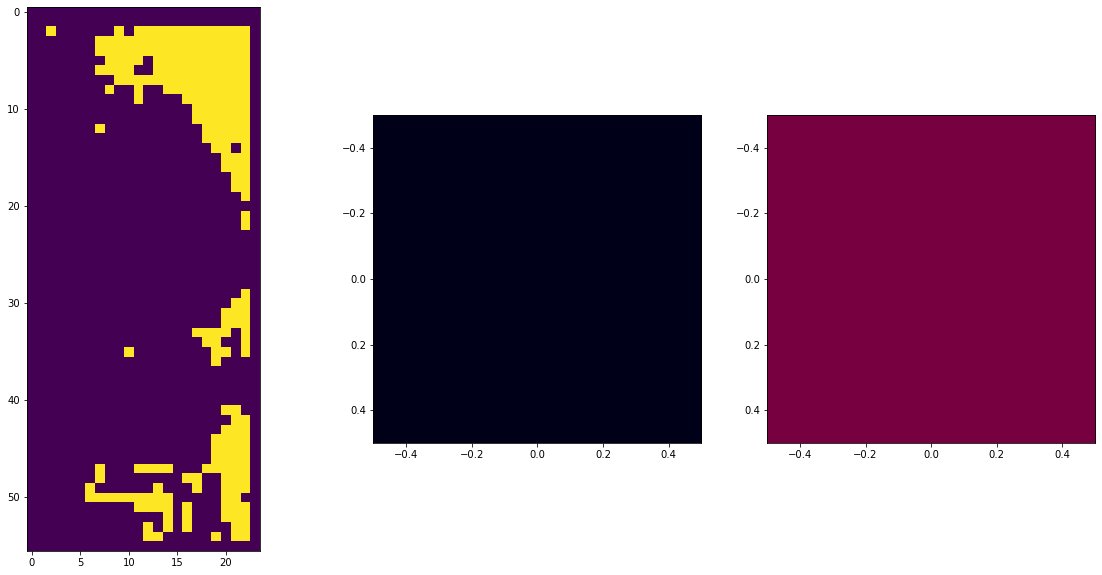

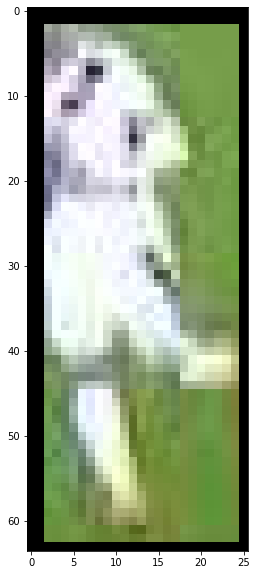

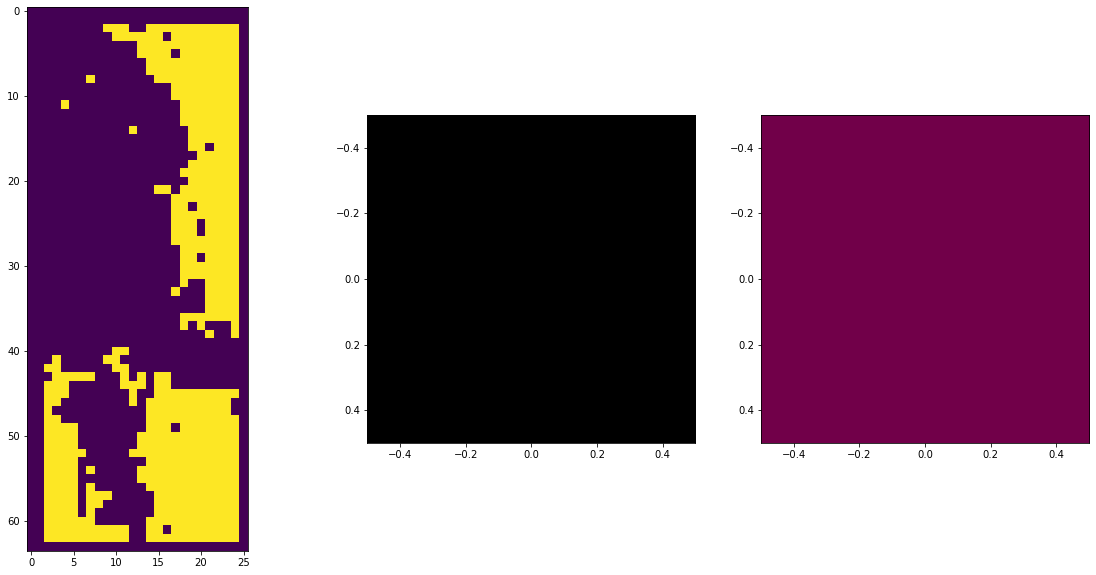

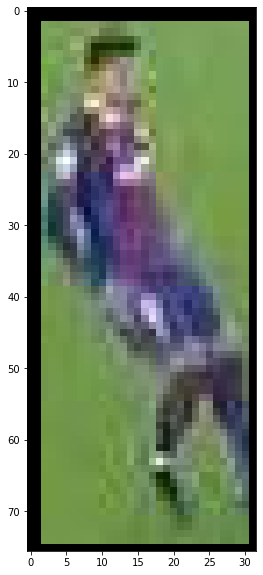

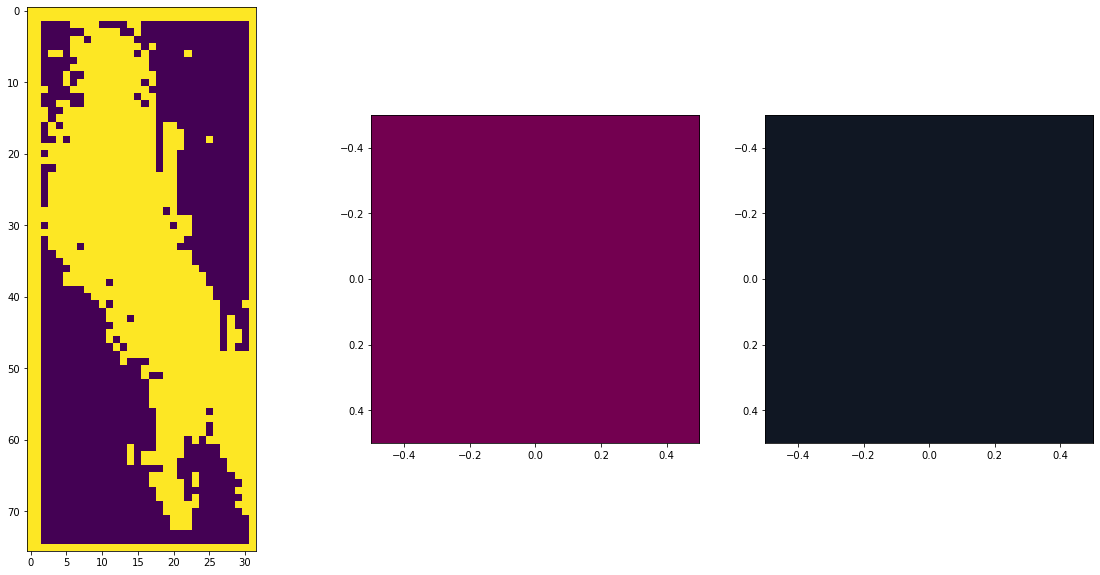

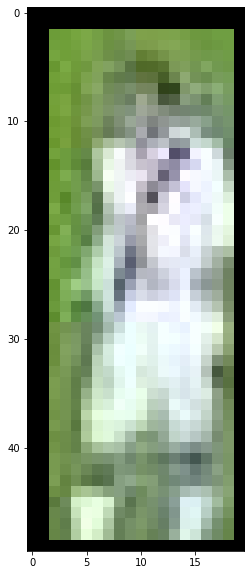

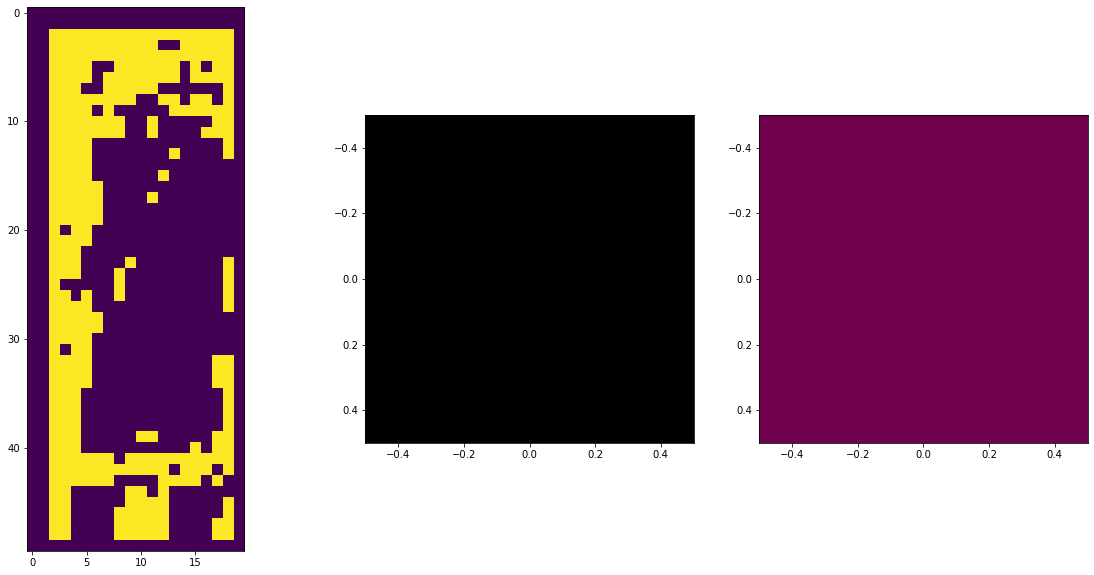

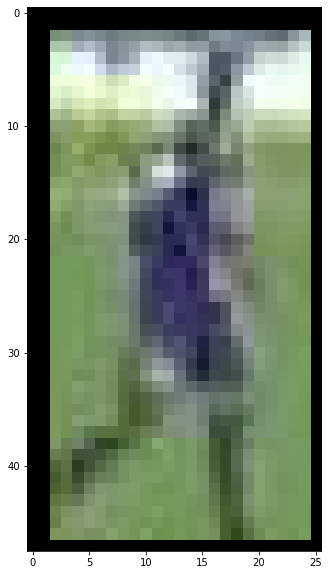

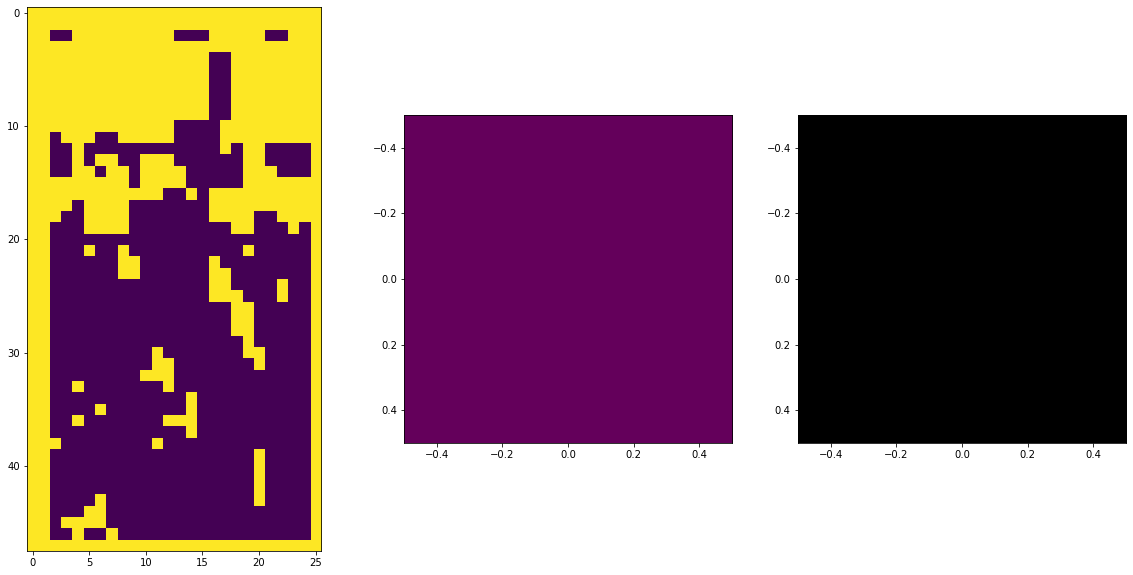

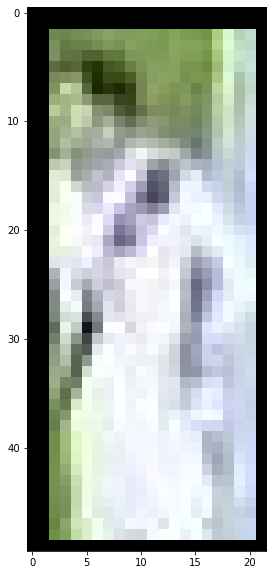

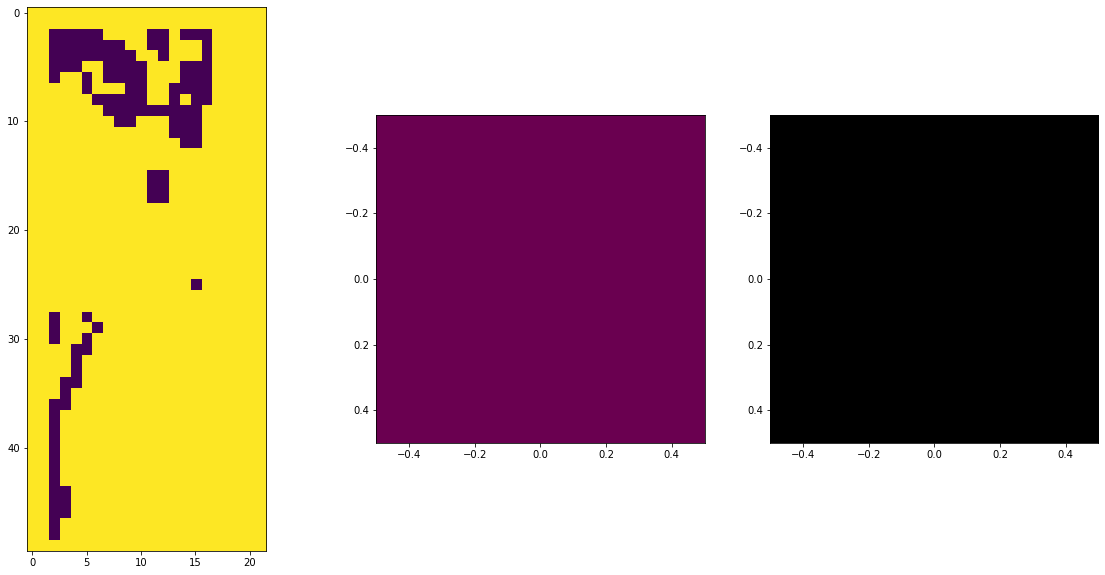

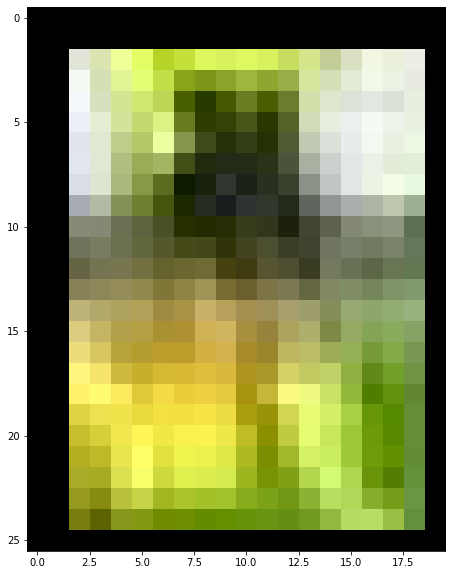

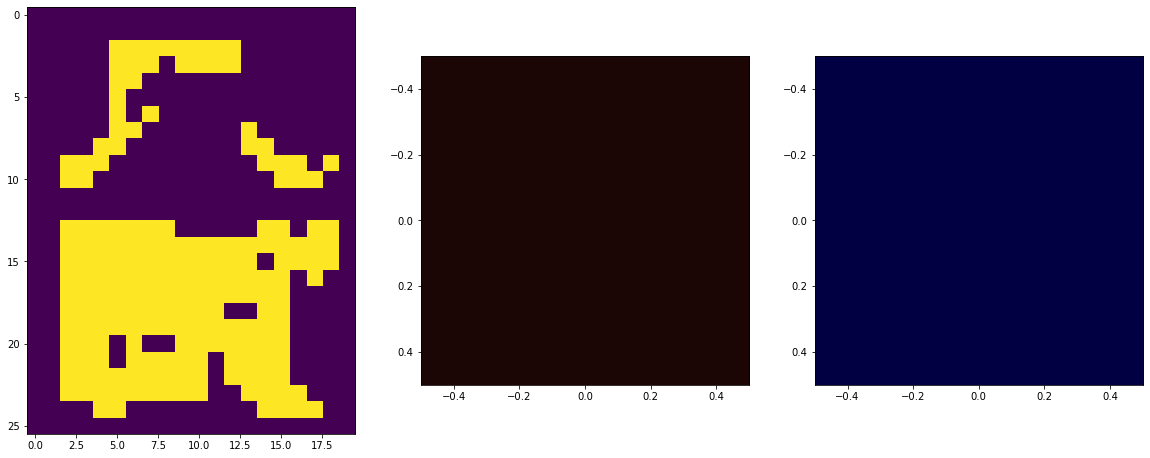

In [22]:
box_color=[]
for i in range(player_number):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)
    ax1.imshow(get_cropped_box(boxes_player[i]))
    box_color.append(get_clusters(boxes_player[i])[1])
    print(f"the dominant colors of image {i} {get_clusters(boxes_player[i])[1]}")
    show_clusters(i)
print(np.shape(box_color))
# clf = svm.SVC()
# clf.fit(np.array(box_color).flatten().reshape(player_number,6).transpose(), ["team a","team b","other"])
